**Tarea 8.- Series de tiempo (Multivariable)**
- Baiza Orona Karen Bibiana
- Maldonado Arana Victor Josue

Las series de tiempo son secuencias de datos o valores que se recogen en intervalos de tiempo consecutivos y se utilizan en diversos campos, incluidos la inteligencia artificial (IA), para modelar, predecir y analizar comportamientos a lo largo del tiempo

- *Dataset - Datos meteorológicos de New York del 2016*



In [ ]:
import numpy as np
#Libreria para la manipulación y análisis de datos, sirve para la lectura e importación de la información en formato csv
import pandas as pd
#Libreria que contiene la estructura principal de pandas.
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos
dataset = pd.read_csv('weather_data_nyc_centralpark_2016.csv')
print(dataset.head)

<bound method NDFrame.head of            date  maximum temperature  minimum temperature  \
0      1-1-2016                   42                   34   
1      2-1-2016                   40                   32   
2      3-1-2016                   45                   35   
3      4-1-2016                   36                   14   
4      5-1-2016                   29                   11   
..          ...                  ...                  ...   
361  27-12-2016                   60                   40   
362  28-12-2016                   40                   34   
363  29-12-2016                   46                   33   
364  30-12-2016                   40                   33   
365  31-12-2016                   44                   31   

     average temperature precipitation snow fall snow depth  
0                   38.0          0.00       0.0          0  
1                   36.0          0.00       0.0          0  
2                   40.0          0.00       0.0   

In [ ]:
# Seleccionamos las columnas relevantes para el análisis
# En este caso, trabajaremos con 'maximum temperature', 'minimum temperature', 'average temperature'
dataset = dataset[['maximum temperature', 'minimum temperature']]

print(dataset.head())

   maximum temperature  minimum temperature
0                   42                   34
1                   40                   32
2                   45                   35
3                   36                   14
4                   29                   11


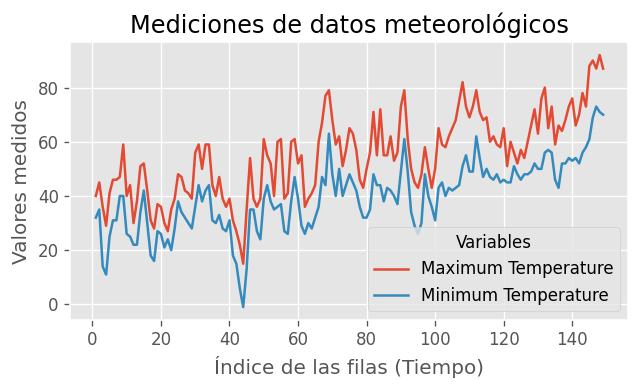

In [ ]:
# Datos originales
# Gráfica para visualizar las primeras 150 mediciones de temperaturas máximas y mínimas

plt.figure(figsize=(6, 3), dpi=120)
plt.style.use("ggplot")                                                      # Establece el estilo de la gráfica
# Graficar las diferentes columnas (150 filas en total)
plt.plot(dataset['maximum temperature'][1:150], label='Maximum Temperature')
plt.plot(dataset['minimum temperature'][1:150], label='Minimum Temperature')

# Título y etiquetas
plt.title('Mediciones de datos meteorológicos')
plt.xlabel('Índice de las filas (Tiempo)')  # Eje X
plt.ylabel('Valores medidos')               # Eje Y
plt.legend(title='Variables')               # Leyenda con el título
plt.show()

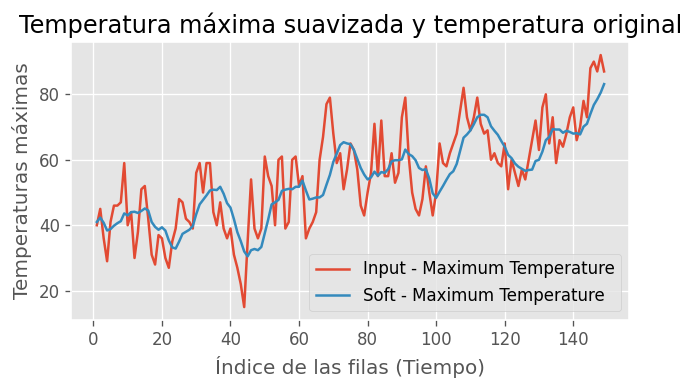

In [ ]:
# Suavizamos los datos con la media móvil
# Media móvil: La media móvil es un método estadístico utilizado para suavizar una serie de datos,
# eliminando fluctuaciones o ruidos de corto plazo y ayudando a destacar las tendencias a largo plazo.
# Es ampliamente utilizada en análisis de series temporales, como en el análisis de datos financieros,
# meteorológicos, o de ventas.
dataset_soft = pd.DataFrame(dataset).rolling(window=8, min_periods=1).mean()

# rolling(window=8, min_periods=1): Aplica la función de "ventana deslizante" (rolling window) sobre los datos.
# window=8: Establece el tamaño de la ventana en 8 elementos (es decir, calcula la media de los 8 valores anteriores, incluyendo el actual).
# min_periods=1: Permite calcular la media con solo 1 valor si no hay suficientes datos en la ventana (por ejemplo, al principio de la serie).
# .mean(): Calcula la media de los valores dentro de la ventana de 8 elementos para suavizar las fluctuaciones de los datos.

# Graficamos los datos originales contra los suavizados
plt.figure(figsize=(6, 3), dpi=120)
plt.style.use("ggplot")
#Se muestra la información gráficamente, donde Input son los datos originales de entrada, y los Soft son los datos con la media móvil.

# Graficar temperatura máxima original (Input) en el eje Y con los índices (eje X)
plt.plot(dataset['maximum temperature'][1:150], label='Input - Maximum Temperature')   # Input: Son los valores de la temperatura máxima tal como se encuentran en el conjunto de datos sin modificaciones.

# Graficar temperatura máxima suavizada (Soft) en el eje Y con los índices (eje X)     # Soft: Son los valores de la temperatura máxima después de aplicar la media móvil, que suaviza las fluctuaciones de los datos.
plt.plot(dataset_soft['maximum temperature'][1:150], label='Soft - Maximum Temperature')
# Título y etiquetas
plt.title('Temperatura máxima suavizada y temperatura original')
plt.xlabel('Índice de las filas (Tiempo)')  # Eje X (número de día o el paso del tiempo en el conjunto de datos)
plt.ylabel('Temperaturas máximas')          # Eje Y ()
plt.legend()
plt.show()

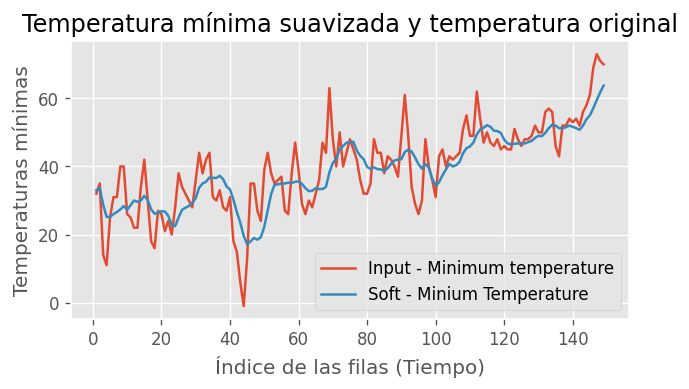

In [ ]:
# Graficamos los datos originales contra los suavizados
plt.figure(figsize=(6, 3), dpi=120)
plt.style.use("ggplot")

# Graficar temperatura minimizar original (Input) en el eje Y con los índices (eje X)
plt.plot(dataset['minimum temperature'][1:150], label='Input - Minimum temperature')      # Input: Son los valores de la temperatura minimas tal como se encuentran en el conjunto de datos sin modificaciones.

# Graficar temperatura minimizar suavizada (Soft) en el eje Y con los índices (eje X)     # Soft: Son los valores de la temperatura minimas después de aplicar la media móvil, que suaviza las fluctuaciones de los datos.
plt.plot(dataset_soft['minimum temperature'][1:150], label='Soft - Minium Temperature')
# Título y etiquetas
plt.title('Temperatura mínima suavizada y temperatura original')
plt.xlabel('Índice de las filas (Tiempo)')  # Eje X (número de día o el paso del tiempo en el conjunto de datos)
plt.ylabel('Temperaturas mínimas')          # Eje Y ()
plt.legend()
plt.show()

In [ ]:
def series_to_supervised(data, w=1, h=1, dropnan= True):
  n_variables = 1 if type(data) is list else data.shape[1]
  print(n_variables)
  df = DataFrame(data)
  cols, names = [], []
  #Datos de entrada, secuencia temporal (t-w, ..., t)
  for i in range(w, 0, -1):
    cols.append(df.shift(i))
    if i-1 == 0:
      names += [('Var {} (t)'.format(j+1)) for j in range(n_variables)]
    else:
      names += [('Var {} (t-{})'.format(j+1, i-1)) for j in range(n_variables)]
  #Datos de pronóstico, salida esperada (t+1, ..., t+h)
  for i in range(h):
    cols.append(df.shift(-1))
    names += [('Var {} (t+{})'.format(j+1, i+1)) for j in range(n_variables)]
  #Concatenar información
  agg = pd.concat(cols, axis= 1)
  agg.columns = names
  if dropnan:
    agg.dropna(inplace= True)
  return agg

In [ ]:
                   # Especifica cuántos valores anteriores se utilizarán para hacer la predicción
window_size = 5    # tomara los ultimos 5 valores atras y los utilizara para predecir (se vuelven datos de entrada)
horizon = 1        # Este parámetro especifica cuántos pasos hacia el futuro se quieren predecir
var_num = 2        # Especifica cuantas columnas seran utilizadas  (2 mínima y máxima)

dataset_serialized = series_to_supervised(dataset, window_size, horizon, dropnan = True)
print(dataset_serialized)

2
     Var 1 (t-4)  Var 2 (t-4)  Var 1 (t-3)  Var 2 (t-3)  Var 1 (t-2)  \
5           42.0         34.0         40.0         32.0         45.0   
6           40.0         32.0         45.0         35.0         36.0   
7           45.0         35.0         36.0         14.0         29.0   
8           36.0         14.0         29.0         11.0         41.0   
9           29.0         11.0         41.0         25.0         46.0   
..           ...          ...          ...          ...          ...   
360         40.0         30.0         49.0         37.0         47.0   
361         49.0         37.0         47.0         38.0         47.0   
362         47.0         38.0         47.0         38.0         50.0   
363         47.0         38.0         50.0         36.0         50.0   
364         50.0         36.0         50.0         33.0         60.0   

     Var 2 (t-2)  Var 1 (t-1)  Var 2 (t-1)  Var 1 (t)  Var 2 (t)  Var 1 (t+1)  \
5           35.0         36.0         14.0       29.

In [ ]:
# Procesamiento de datos
# Al normalizar los números deben de estar entre 0 y 1
# Ahora puedes normalizar los datos
dataset_normalizado = preprocessing.minmax_scale(dataset_serialized, feature_range=(0, 1))

# Mostrar los datos normalizados
print(dataset_normalizado)

[[0.33333333 0.42682927 0.30864198 ... 0.14634146 0.38271605 0.3902439 ]
 [0.30864198 0.40243902 0.37037037 ... 0.31707317 0.38271605 0.3902439 ]
 [0.37037037 0.43902439 0.25925926 ... 0.3902439  0.39506173 0.5       ]
 ...
 [0.39506173 0.47560976 0.39506173 ... 0.5        0.38271605 0.41463415]
 [0.39506173 0.47560976 0.43209877 ... 0.42682927 0.30864198 0.41463415]
 [0.43209877 0.45121951 0.43209877 ... 0.41463415 0.35802469 0.3902439 ]]


In [ ]:
print(dataset_normalizado.shape)
dataset_normalizado = dataset_normalizado.reshape(dataset_normalizado.shape[0], var_num, window_size+horizon)
print(dataset_normalizado.shape)

(360, 12)
(360, 2, 6)


In [ ]:
# Se usa para series de tiempos multivariables

x = dataset_normalizado[:, :,:-horizon]
y = dataset_normalizado[:, :, -horizon:]

#Dividimos la información en dos partes, la información que será utilzada para entrenamiento y la información para probar la calidad del aprendizaje
#Existen diferentes puntos de vista cuanto porcentaje para cada uno, pero aquí se utilizará 80% para entrenamiento y 20% para pruebas.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state=22)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= .2, random_state=22)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(230, 2, 5)
(58, 2, 5)
(72, 2, 5)
(230, 2, 1)
(58, 2, 1)
(72, 2, 1)


Construcción del modelo y entrenamiento

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(20, activation = 'relu', input_shape=(x_train.shape[1], x_train.shape[2]))) # importante declarar correctamente shape
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(horizon, activation = 'sigmoid'))    # función de activación para la neurona de salida

#Se compila el modelo y se define el optimizador y metricas a utilizar
model.compile(loss = 'mse', optimizer = 'adam', metrics=['mse'])

#Se entrena el modelo y se almacena en una variable los resultados del entrenamiento.
history = model.fit(x_train, y_train, epochs=100, batch_size=24, validation_data=(x_val, y_val), verbose=1, shuffle=False)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mse: 0.

Evaluación del modelo

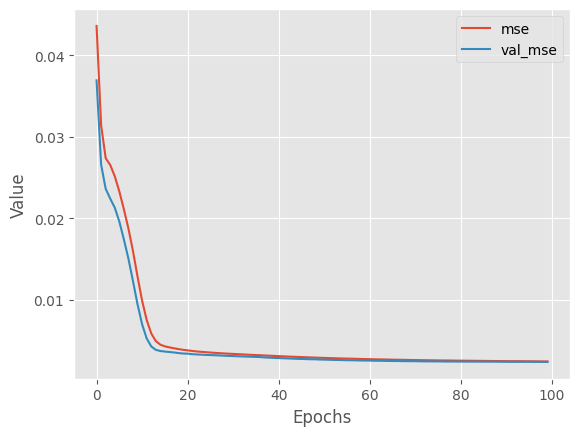

In [ ]:
# Evaluación del modelo
plt.style.use("ggplot")
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

**mse:** Esta es la métrica de error cuadrático medio en el conjunto de datos de entrenamiento. El MSE es una medida que calcula la media de los errores al elevar al cuadrado las diferencias entre los valores predichos y los valores reales. Cuanto menor sea este valor, mejor será el rendimiento del modelo en el conjunto de entrenamiento.

**val_mse:** Este es el error cuadrático medio calculado en el conjunto de datos de validación. Durante el entrenamiento, el modelo también evalúa su rendimiento en un conjunto de datos distinto del de entrenamiento (llamado conjunto de validación). El val_mse se utiliza para ver cómo generaliza el modelo en datos que no ha visto durante el entrenamiento.

Un buen modelo debería tener una mse que disminuya con el tiempo y, preferiblemente, también una val_mse que siga una tendencia similar.

In [ ]:
#Se evalua el modelo
aciertos = model.evaluate(x_test, y_test, verbose=0)
print('Perdida:', aciertos[0])

Perdida: 0.002186498139053583


In [ ]:
predictions = model.predict(x_test, verbose=0)
print(predictions[:5])

[[[0.79194546]
  [0.870995  ]]

 [[0.57733834]
  [0.5401145 ]]

 [[0.4831513 ]
  [0.45448345]]

 [[0.89274603]
  [0.89315593]]

 [[0.71147275]
  [0.7946832 ]]]


In [ ]:
preds = predictions.reshape(predictions.shape[0], 2)
y_original = y_test.reshape(y_test.shape[0], 2)

print(preds[:5])  # Verifica los primeros 5 elementos

[[0.79194546 0.870995  ]
 [0.57733834 0.5401145 ]
 [0.4831513  0.45448345]
 [0.89274603 0.89315593]
 [0.71147275 0.7946832 ]]


In [ ]:
print(predictions.shape)
print(y_test.shape)

(72, 2, 1)
(72, 2, 1)


Gráficas de predicciones

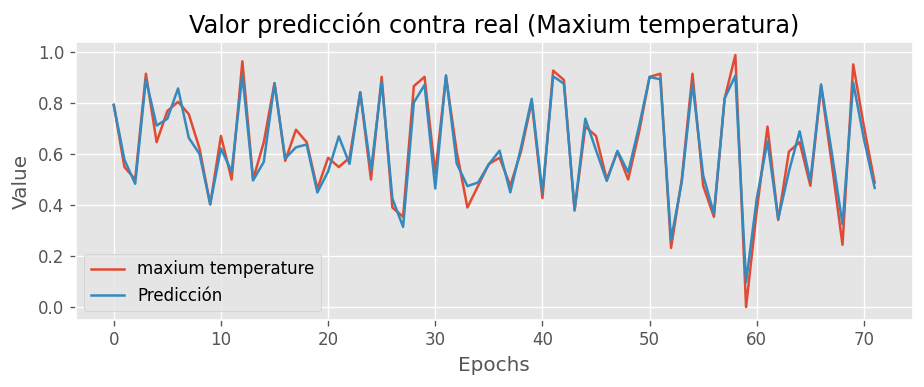

In [ ]:
#Se gráfican los resultados (Maxium temperature)
plt.figure(num=None, figsize=(9, 3), dpi=120, facecolor='w', edgecolor='k')
plt.plot(y_original[0:100,0], label= 'maxium temperature')
plt.plot(predictions[0:100,0], label='Predicción')
plt.title('Valor predicción contra real (Maxium temperatura)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

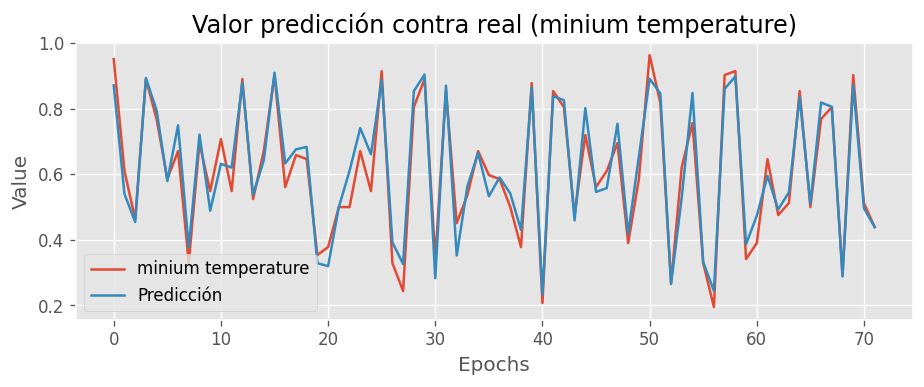

In [ ]:
#Se gráfican los resultados
plt.figure(num=None, figsize=(9, 3), dpi=120, facecolor='w', edgecolor='k')
plt.plot(y_original[0:100,1], label= 'minium temperature')
plt.plot(predictions[0:100,1], label='Predicción')
plt.title('Valor predicción contra real (minium temperature)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()
